# Analyse du Test set du défi IA

In [34]:
library(data.table)
library(ggplot2)

In [3]:
test_set = fread("test_set.csv")

In [16]:
names(test_set)
test_set$city <- as.factor(test_set$city)
test_set$language <- as.factor(test_set$language)
test_set$avatar_id <- as.factor(test_set$avatar_id)
test_set$hotel_id <- as.factor(test_set$hotel_id)

[1] "index"          "order_requests" "city"           "date"          
[5] "language"       "mobile"         "avatar_id"      "hotel_id"      
[9] "stock"

In [17]:
print(paste0("number_of_unique_avatar = ", uniqueN(test_set$avatar_id)))
print(paste0("number_of_unique_language = ", uniqueN(test_set$language)))
print(paste0("number_of_unique_city = ", uniqueN(test_set$city)))
print(paste0("number_of_unique_hotel = ", uniqueN(test_set$hotel_id)))

[1] "number_of_unique_avatar = 785"
[1] "number_of_unique_language = 27"
[1] "number_of_unique_city = 9"
[1] "number_of_unique_hotel = 185"


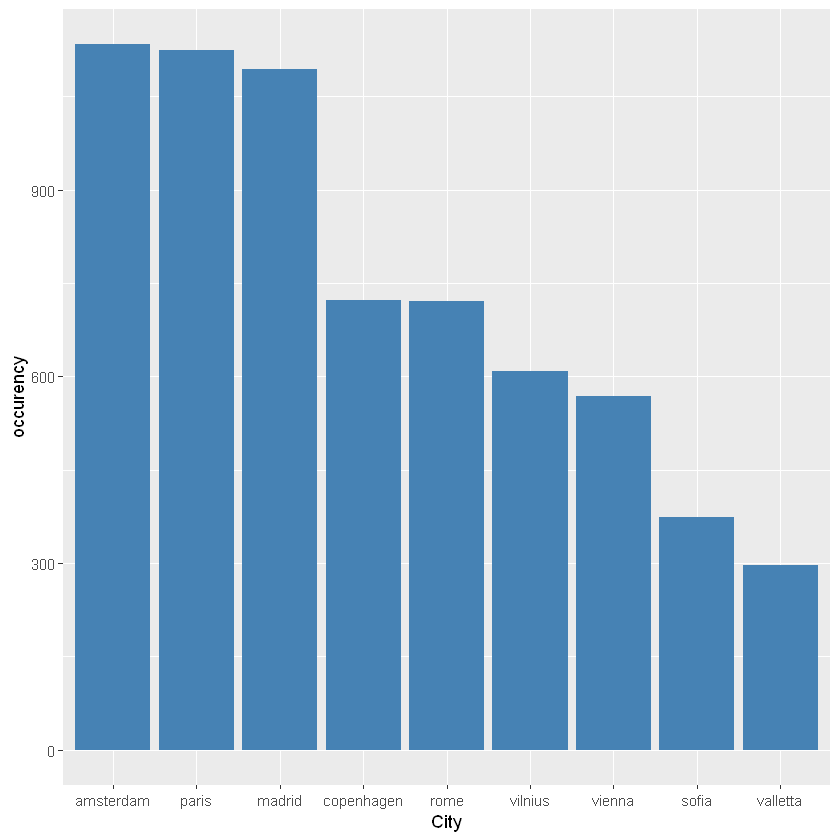

In [49]:
p<-ggplot(data=test_set[, .N, by = city], aes(x=reorder(city, -N), y=N)) +
  geom_bar(stat="identity", fill="steelblue") +  labs(x = "City", y = "occurency")
p

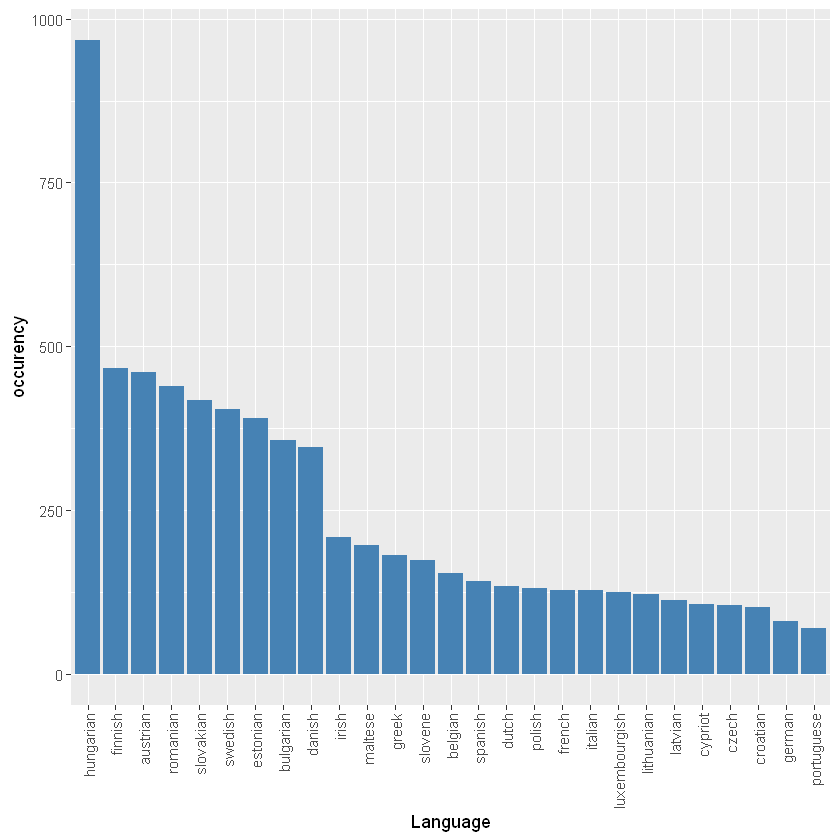

In [50]:
p<-ggplot(data=test_set[, .N, by = language], aes(x=reorder(language, -N), y=N)) +
  geom_bar(stat="identity", fill="steelblue")+
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) + labs(x = "Language", y = "occurency")
p

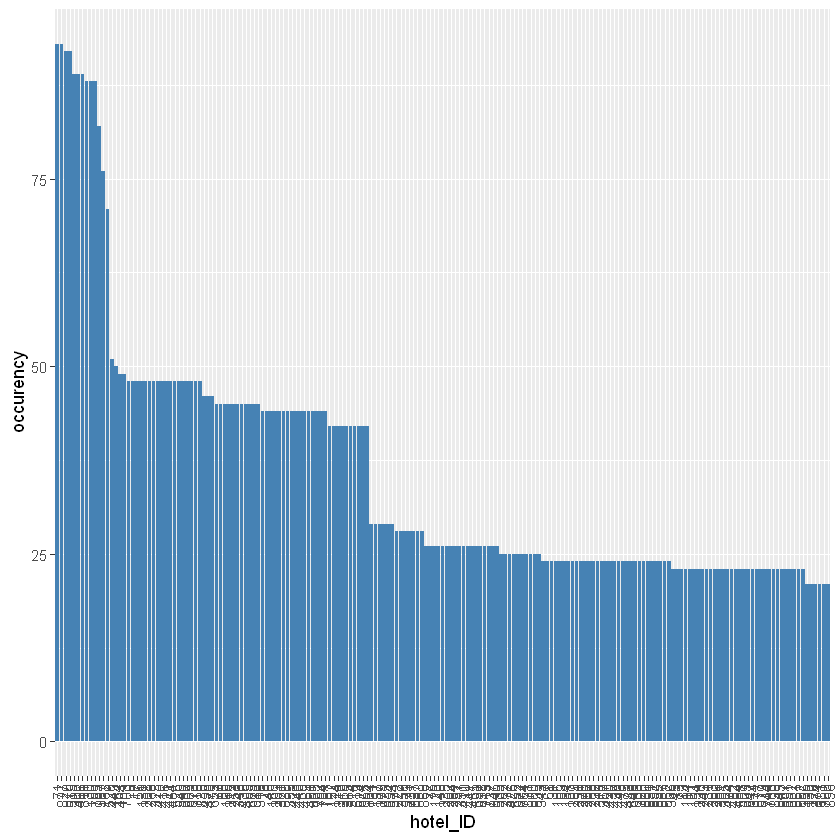

In [51]:
p<-ggplot(data=test_set[, .N, by = hotel_id], aes(x=reorder(hotel_id, -N), y=N)) +
  geom_bar(stat="identity", fill="steelblue")+
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) + labs(x = "hotel_ID", y = "occurency")
p

Ce dernier est impossible à lire :'(

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



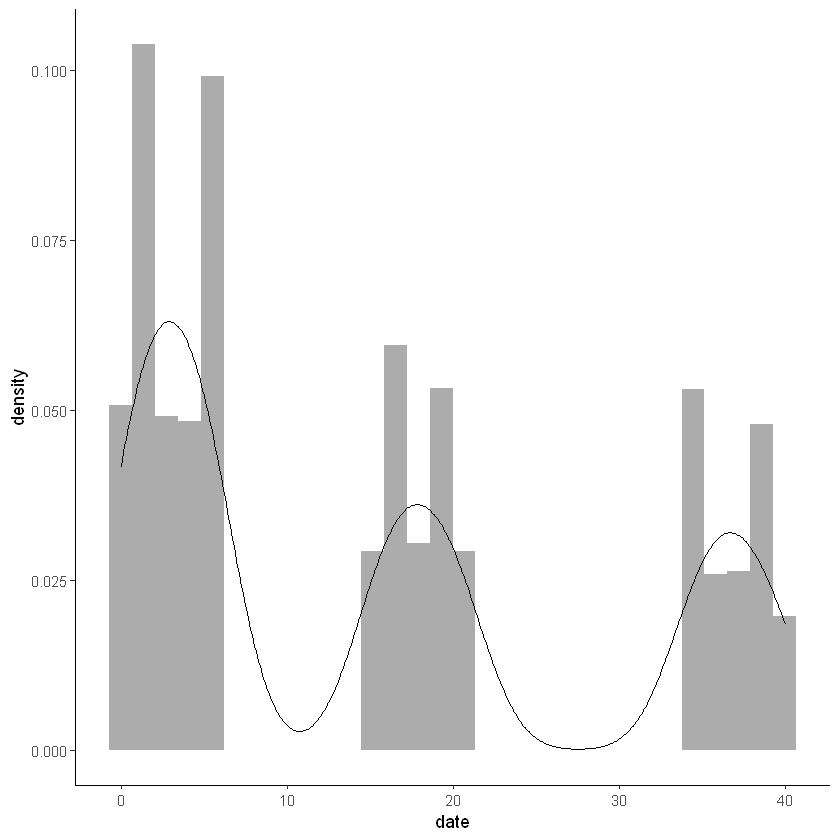

In [53]:
ggplot(test_set, aes(x=date)) +
geom_histogram(aes(y=..density..), position="identity", alpha=0.5)+
geom_density(alpha=0.6)+
theme_classic()

Bizarre... Il ne semble pas y avoir de requêtes formulées entre 5 et 15 jours de la réservation. De même pour l'intervalle 20;34

### Proportion of avatars looking for more than one city

In [60]:
n.unique.avatar = uniqueN(test_set$avatar_id)
n.city.by.avatar = test_set[,uniqueN(city), by = avatar_id]
setnames(n.city.by.avatar, "V1", "n.unique.city")

In [64]:
n.city.by.avatar[, table(n.unique.city)/n.unique.avatar]

n.unique.city
          1           2           3 
0.982165605 0.014012739 0.003821656 

We have 2% of our avatars that are looking for new cities

In [81]:
n.avatar.w2or.more = n.city.by.avatar[n.unique.city != 1, .N]
print(paste("Number of avatar with more than one city:", n.avatar.w2or.more))
n.city.by.avatar[n.unique.city != 1, table(n.unique.city)/n.avatar.w2or.more]

[1] "Number of avatar with more than one city: 14"


n.unique.city
        2         3 
0.7857143 0.2142857 

Among avatars looking for more than one city, 79% are looking for 2 cities and 21% for 3 cities.

### Proportion of avatars using different language for their research

In [82]:
n.language.by.avatar = test_set[,uniqueN(language), by = avatar_id]
setnames(n.language.by.avatar, "V1", "n.unique.language")

In [83]:
n.language.by.avatar[, table(n.unique.language)/n.unique.avatar]

n.unique.language
          1           2           3 
0.984713376 0.014012739 0.001273885 

Tiens tiens tiens, les stats des pays coïncident quand même vachement bien avec les stats des langues... (j'en perds mon anglais)

In [84]:
n.avatar.w2or.more.language = n.language.by.avatar[n.unique.language != 1, .N]
print(paste("Number of avatar with more than one language:", n.avatar.w2or.more.language))
n.language.by.avatar[n.unique.language != 1, table(n.unique.language)/n.avatar.w2or.more.language]

[1] "Number of avatar with more than one language: 12"


n.unique.language
         2          3 
0.91666667 0.08333333 

### Etude du lien entre la langue et le pays de réservation

In [77]:
merged.table = merge(n.city.by.avatar, n.language.by.avatar, by = "avatar_id")

In [79]:
merged.table[n.unique.city != 1 & n.unique.language != 1,]

avatar_id,n.unique.city,n.unique.language
<fct>,<int>,<int>
16,2,2
27,3,3


Ok donc parmis les 14 avatars avec plus d'une ville et les 12 avatars avec plus d'une langue, seuls 2 avatars appartiennent aux deux groupes.

# Conclusion

La langue et la ville ne semblent pas si corrélés que ça mais le porucentage d'avatar avec plus d'une langue et celui avec plus d'une ville semble posséder la même répartition. ( $\alpha= 0.02$)


Reste à voir, si on définit un seuil pour différencier les avatars avec 2 ou 3 villes et un seuil pour les avatars entre 2 ou 3 langues.